# Image Processing Lab08

## Setup

In [1]:
!apt update && apt install -y ffmpeg libsm6 libxext6
!pip install tensorflow
!pip install opencv-python

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,906 kB]
Get:5 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,792 B]
Get:6 http://security.debian.org/debian-security buster/updates/main amd64 Packages [316 kB]
Fetched 8,470 kB in 2s (5,265 kB/s)



12 packages can be upgraded. Run 'apt list --upgradable' to see them.



libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1+b2).
libxext6 set to manually installed.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58 libavdevice58
  libavfilter7 libavformat58 libavresample4 libavutil5

## Import

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

## 8.1 Prepare features for Main images, Tile images

### 8.1.1 Prepare main image feature

In [148]:
# Load main image
main_img = cv.imread("main.jpg")
main_img = cv.cvtColor(main_img, cv.COLOR_BGR2RGB)
print(main_img.shape)

height, width, channels = main_img.shape

(720, 1280, 3)


In [149]:
# Define tile size (height, width)
tile_size = (30, 30)

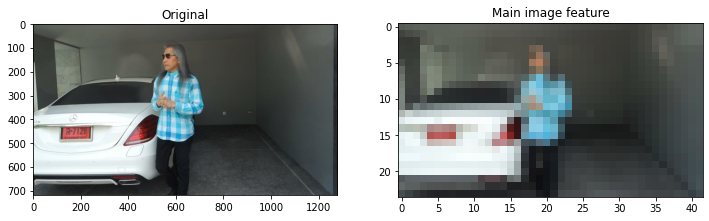

In [184]:
# Create main image feature grid subimage
# Calculate average(mean) color of each subimage with tile size

feature_height = 24
feature_width = 42

main_image_feature = np.zeros(shape=(feature_height, feature_width, 3), dtype=np.uint8)

for i in range(feature_height):
    for j in range(feature_width):
        main_image_feature[i, j] =  main_img[i*tile_size[0]: (i+1)*tile_size[0],
                                        j*tile_size[1]: (j+1)*tile_size[1]].mean(axis=(0, 1))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
ax[0].imshow(main_img)
ax[0].set_title("Original")
ax[1].imshow(main_image_feature)
ax[1].set_title("Main image feature")

plt.show()

### 8.1.2 Prepare tile images features

In [159]:
# Collect filename of all tile images
path =  "/datasets/dataset/Background/*"
all_files = glob.glob(path)
print(f"Images : {len(all_files)}")
print(all_files)

Images : 100
['/datasets/dataset/Background/pexels-beth-easton-2433985.jpg', '/datasets/dataset/Background/pexels-btgleth-3689659.jpg', '/datasets/dataset/Background/pexels-steve-johnson-1724888.jpg', '/datasets/dataset/Background/pexels-john-cahil-rom-2170473.jpg', '/datasets/dataset/Background/pexels-johannes-plenio-2080960.jpg', '/datasets/dataset/Background/pexels-madison-inouye-3826768.jpg', '/datasets/dataset/Background/pexels-pixabay-461940.jpg', '/datasets/dataset/Background/pexels-valeria-boltneva-101472.jpg', '/datasets/dataset/Background/pexels-madison-inouye-2180090.jpg', '/datasets/dataset/Background/pexels-moose-photos-1038001.jpg', '/datasets/dataset/Background/pexels-johannes-plenio-2850287.jpg', '/datasets/dataset/Background/pexels-stanislav-kondratiev-2909067.jpg', '/datasets/dataset/Background/pexels-maria-orlova-4913323.jpg', '/datasets/dataset/Background/pexels-nohk-1735658.jpg', '/datasets/dataset/Background/pexels-jess-bailey-designs-827106.jpg', '/datasets/datas

In [185]:
tiles = []
for img_path in all_files:
    tile = cv.imread(img_path)
    tile = cv.resize(tile,dsize=(tile_size[1], tile_size[0]), interpolation=cv.INTER_AREA)
    tiles.append(tile)
 

In [186]:
# Create array of average (mean) color of each tile image
tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0, 1))
    tile_features.append(mean_color)

## 8.2 Image Clustering and Matching using KNN with KDTree Algorithm

Text(0.5, 1.0, 'KDTree Return Tile Index')

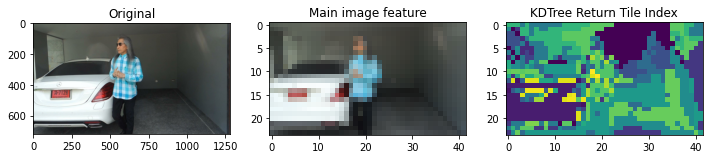

In [187]:
# Create KDTree of tile color features
tree = spatial.KDTree(tile_features)

# KNN (k=1) search for best matched tiles with each subimage

closest_tiles = np.zeros(shape=(feature_height, feature_width), dtype=np.uint8)

for i in range(feature_height):
    for j in range(feature_width):
        closest = tree.query(main_image_feature[i, j])
        closest_tiles[i, j] = closest[1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
ax[0].imshow(main_img)
ax[0].set_title("Original")
ax[1].imshow(main_image_feature)
ax[1].set_title("Main image feature")
ax[2].imshow(closest_tiles)
ax[2].set_title("KDTree Return Tile Index")

## 8.3 Create Image Mosaic

Text(0.5, 1.0, 'Mosaic')

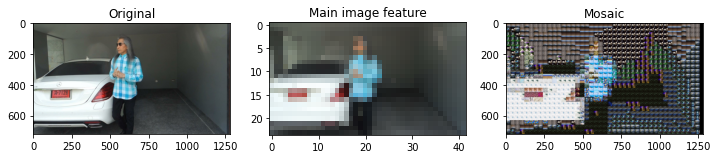

In [189]:
# Fill each subimage with matched tile

main_photo = np.zeros(shape=(height, width, 3), dtype=np.uint8)

for i in range(feature_height):
    for j in range(feature_width):    
    # Offset of tile
        x, y = i*tile_size[0], j*tile_size[1]

        # Index of tile
        index = closest_tiles[i, j]
        main_photo[x: (x+tile_size[0]), y: (y+tile_size[1])] = tiles[index]


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
ax[0].imshow(main_img)
ax[0].set_title("Original")
ax[1].imshow(main_image_feature)
ax[1].set_title("Main image feature")
ax[2].imshow(main_photo)
ax[2].set_title("Mosaic")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d351c1b3-90b6-433c-bb92-4ea7bd79ae71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>